<a href="https://colab.research.google.com/github/ooke22/FoodHub-Data-Analysis/blob/main/FoodHub_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
#uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv(r"/content/drive/MyDrive/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The datatypes of the different coumns in the dataset are:
  - intergers for numerical whole numbers
  - objects for strings
  - Floats for numerical decimal numbers


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: This dataset does not have any missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:Once an order is placed,
  - the **minumum** time it takes for food to be prepared is: <font color ="green"> **20 minutes** </font>.
  - the **average** time it takes for food to be prepared is: <font color ="orange"> **27 minutes** </font>.
  - the **maximum** time it takes for food to be prepared is: <font color ="red"> **35 minutes**.


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: Out of 1898 orders, 736 are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.order_id.nunique()

1898

In [ ]:
df.customer_id.nunique()

1200

In [ ]:
df.restaurant_name.nunique()

178

In [ ]:
df.cuisine_type.nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

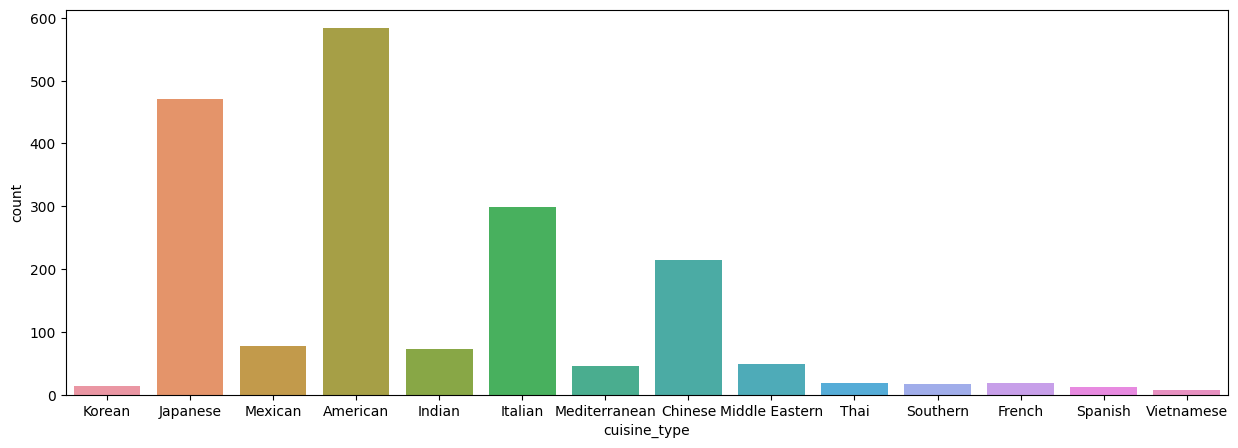

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'cuisine_type')

2


<Axes: xlabel='day_of_the_week', ylabel='count'>

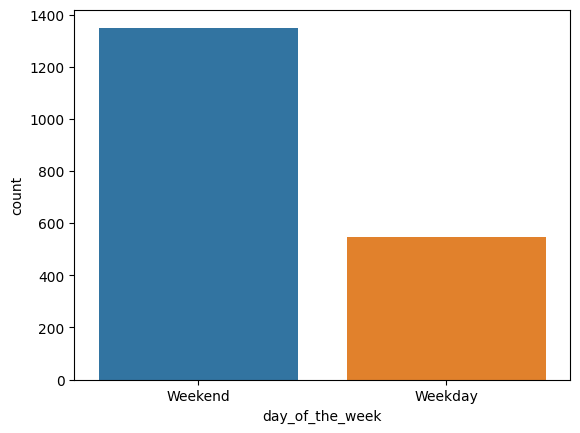

In [ ]:
print(df["day_of_the_week"].nunique())
sns.countplot(data = df, x = 'day_of_the_week')

4
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64


<Axes: xlabel='rating', ylabel='count'>

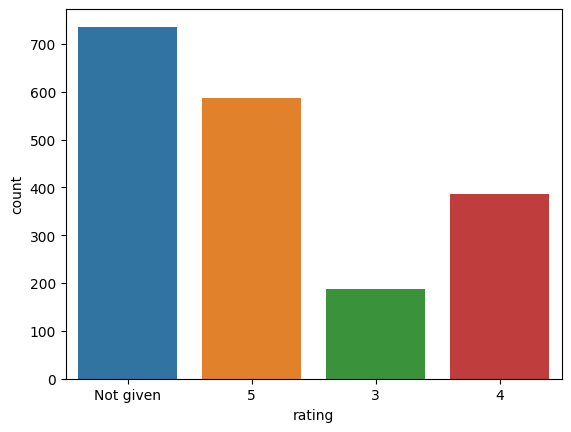

In [ ]:
print(df.rating.nunique())
print(df.rating.value_counts(normalize = True))
sns.countplot(data = df, x = 'rating')

In [ ]:
# Write the code here
#Numerical variables
def hist_boxplot(feature, figsize=(15,10), bins="auto"):
  f, (ax_box, ax_hist) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw={"height_ratios": (.25, .75)},
      figsize = figsize
  )

  #Box plot
  sns.boxplot(x = feature, ax = ax_box, showmeans =True, color = 'red')

  #Hist
  sns.histplot(x = feature, kde = False, ax = ax_hist, bins = bins)
  ax_hist.axvline(np.mean(feature), color = 'g', linestyle = '--')
  ax_hist.axvline(np.median(feature), color = 'black', linestyle = '-')

  plt.show()

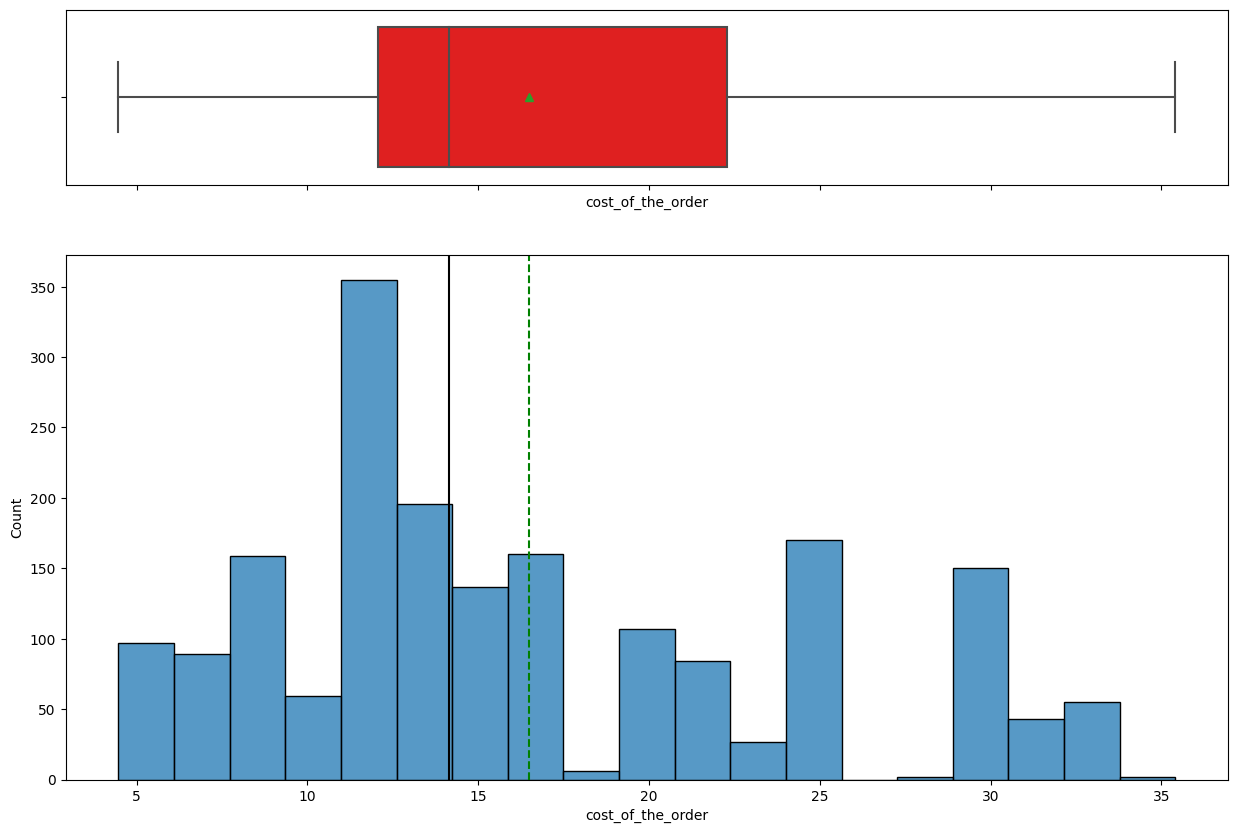

In [ ]:
hist_boxplot(df.cost_of_the_order)

#### Observations:
  - The distribution of order costs is right-skewed.
  - The majority of the cost of orders is close to $12.
  - The median cost of orders is 14, but the mean cost of orders is 16.
  - There are no outliers in this variable.


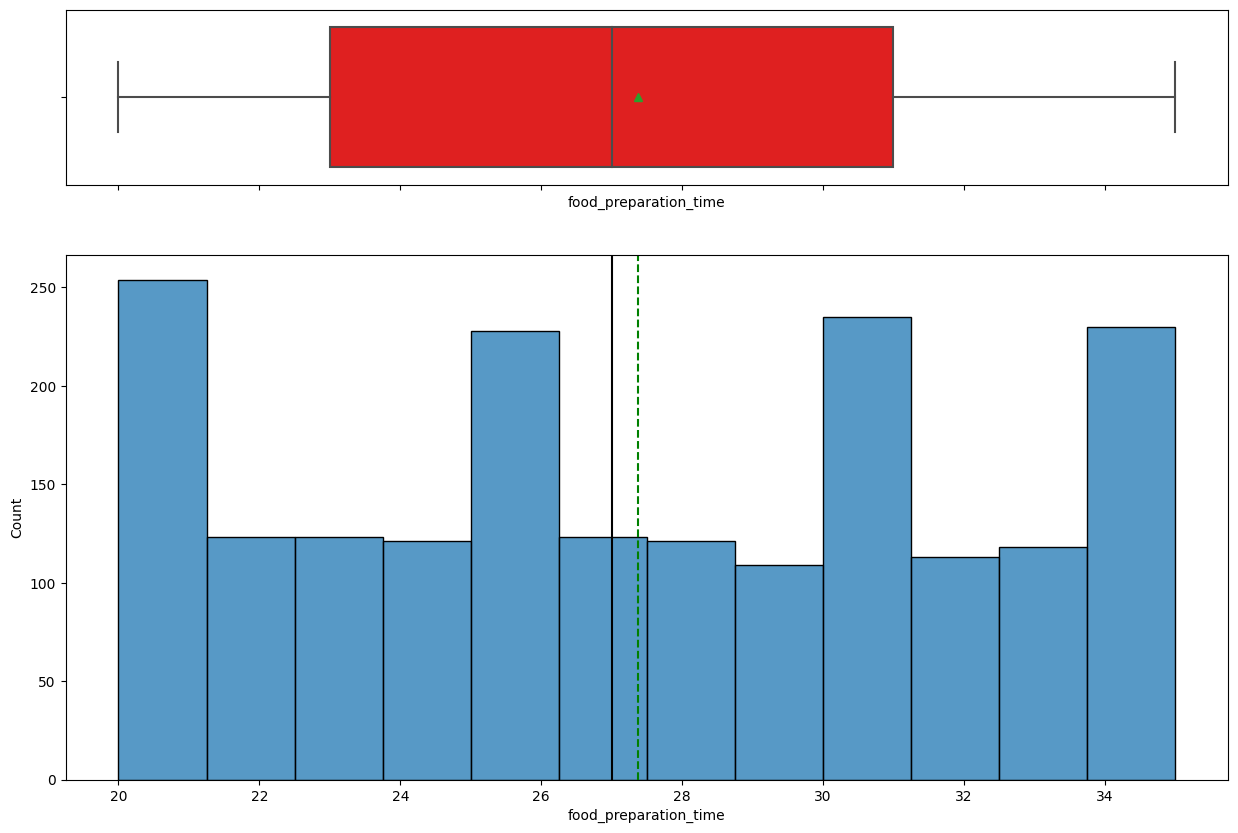

In [ ]:
hist_boxplot(df.food_preparation_time)

#### Observations:
  - Food preparation is right skewed.
  - The majority of the food were prepared in 20 minutes.
  - The median time it took to prepare food is 27 mins and the mean is 27.3 mins.
  -There are no outliers.
  Most foods are prepared within 20 mins but some take as long as 35 minutes to prepare.


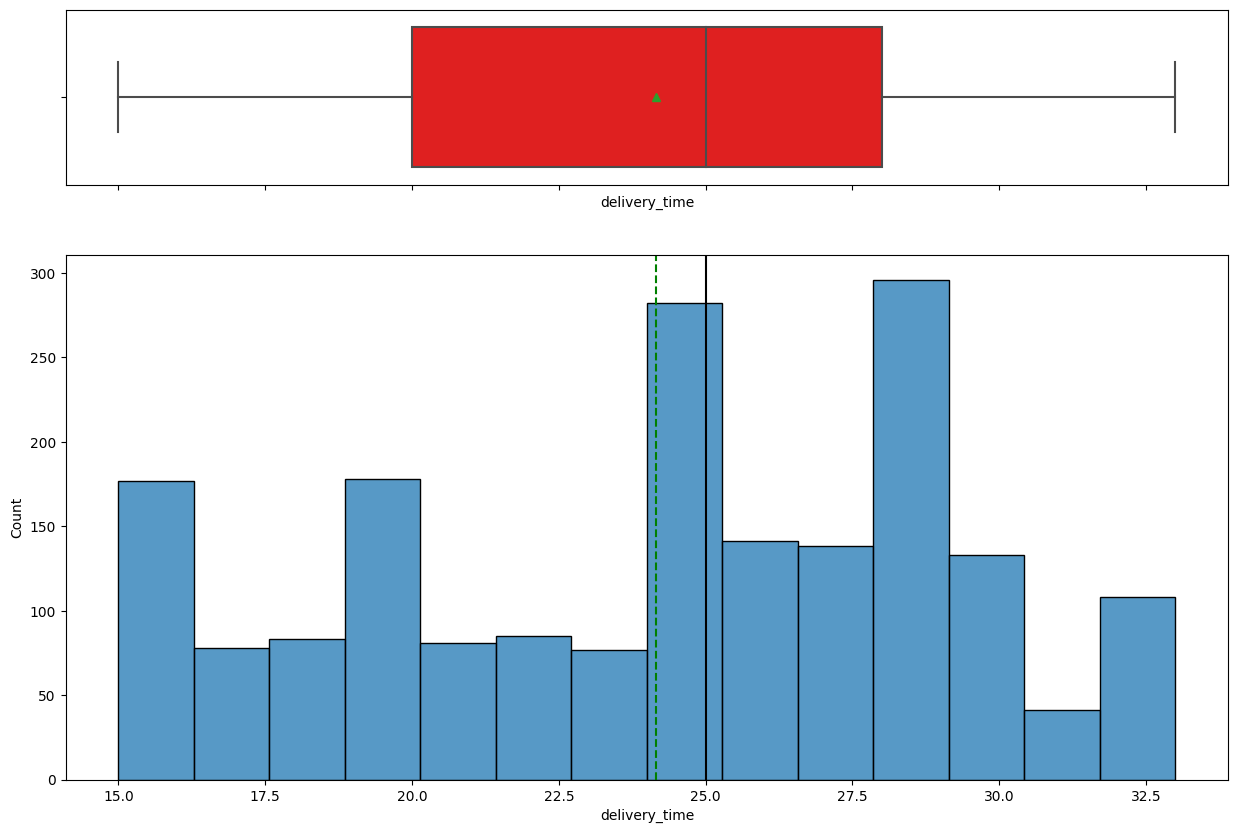

In [ ]:
hist_boxplot(df.delivery_time)

#### Observations:
  - Food delivery time is skewed left.
  -  Majority of food orders took between 24 and 29 minutes to deliver.
  - The median delivery time is approximately 25 minutes while the mean is approximately 24 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
top_res = df[['restaurant_name', 'order_id']].groupby(['restaurant_name']).count().sort_values(by = 'order_id', ascending = False).head()
top_res

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The top restaurants in terms of the number of orders received are:
1. Shake Shack
2. The Meatball Shop
3. Blue RIbbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American is the most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
df_twenty = df[df['cost_of_the_order'] > 20]
print('The number of total orders that cost above 20 dollars is:', df_twenty.shape[0])
percentage = (df_twenty.shape[0] / df.shape[0]) * 100
print('Percentage of orders above 20 dollars:', round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
  - 29.24% of orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations: The mean order delivery time is 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df[['customer_id', 'order_id']].groupby(['customer_id']).count().sort_values(by = 'order_id', ascending = False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations: The top 3 most frequent customer placed 13, 10, and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<ipython-input-25-107f64435c3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

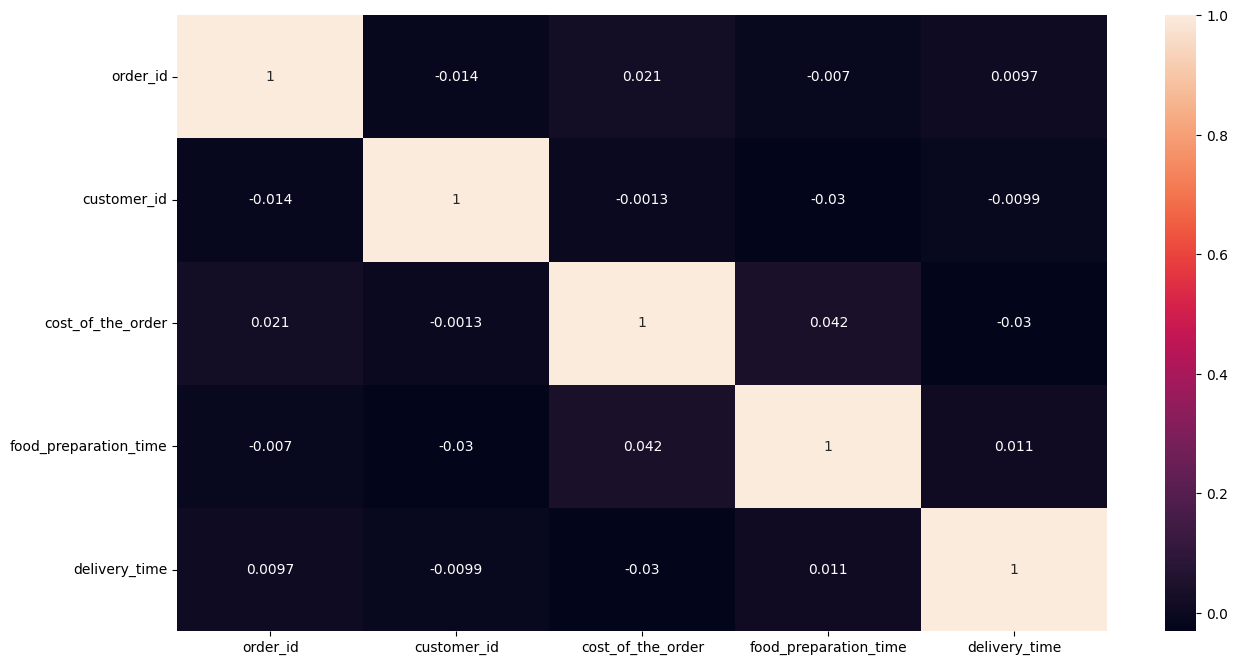

In [ ]:
# Write the code here
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot = True)

#### **Cuisine vs Cost of Order**

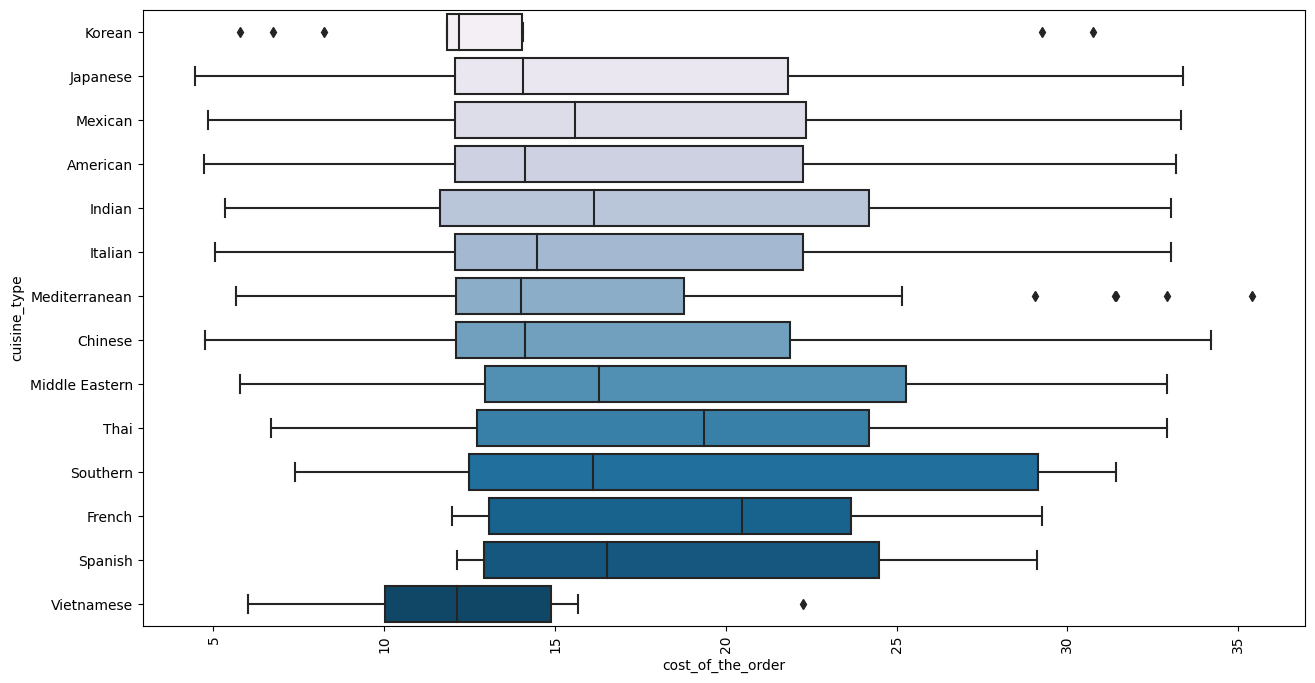

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'cuisine_type', x = 'cost_of_the_order', data = df, palette = 'PuBu')
plt.xticks(rotation = 90)
plt.show()

Majority of the cuisines have different skewed costs. Three of the cuisines: Vietnamese, Mediterranean, and Korean have outliers in their costs

#### **Cuisine vs food preparation time**


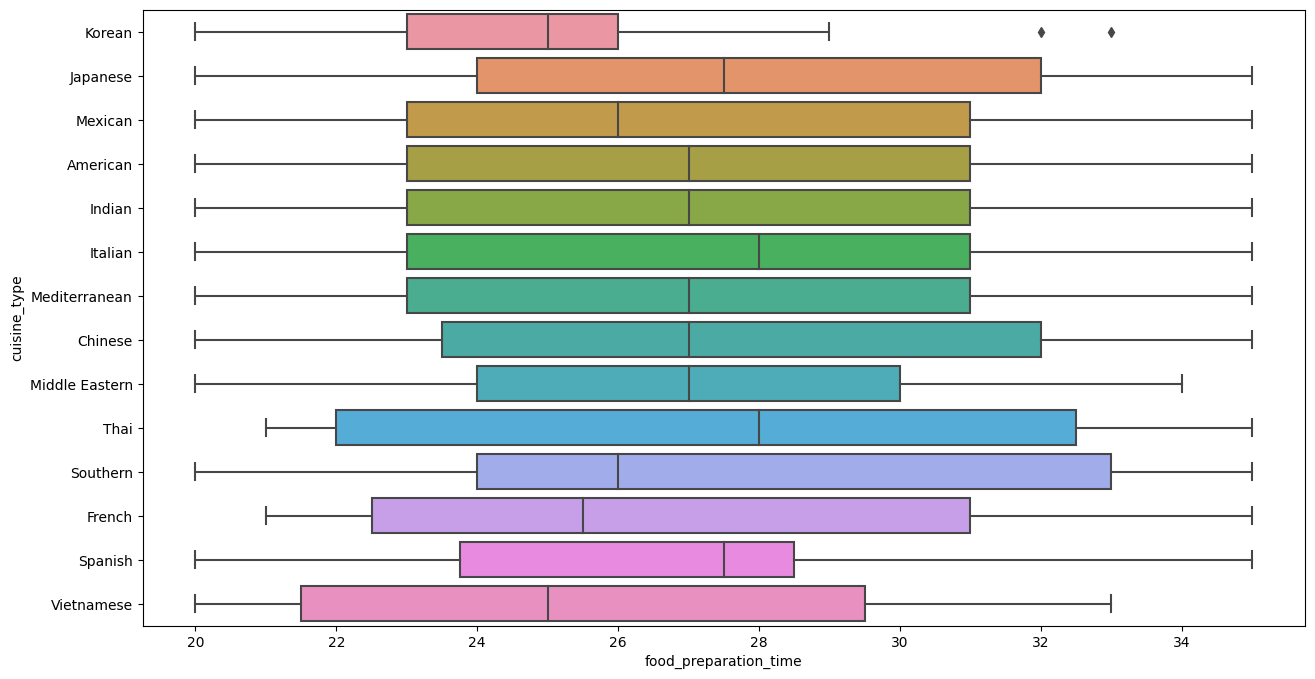

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = df, x = 'food_preparation_time', y = 'cuisine_type')
plt.show()

#### Observation:
  - Most of the cuisine types have approximately have the same average preparation time.

#### **Ratings vs. Delivery Time, Preparation Time, Cost of Order**

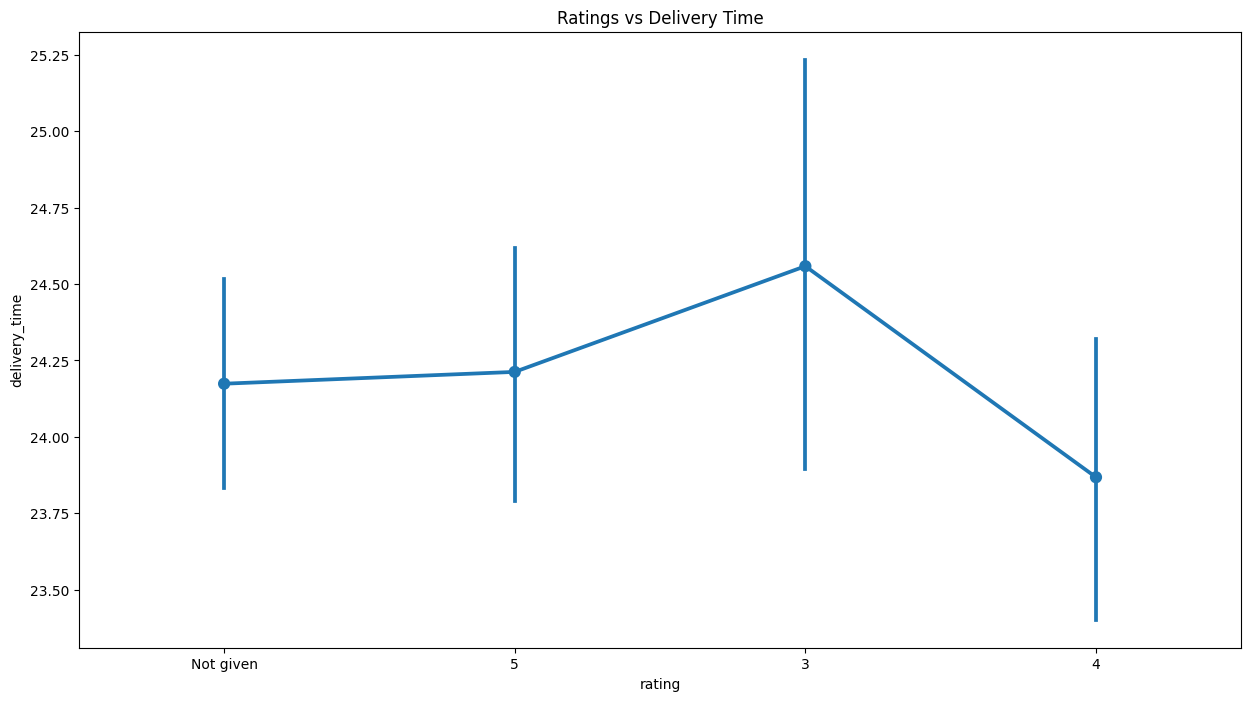

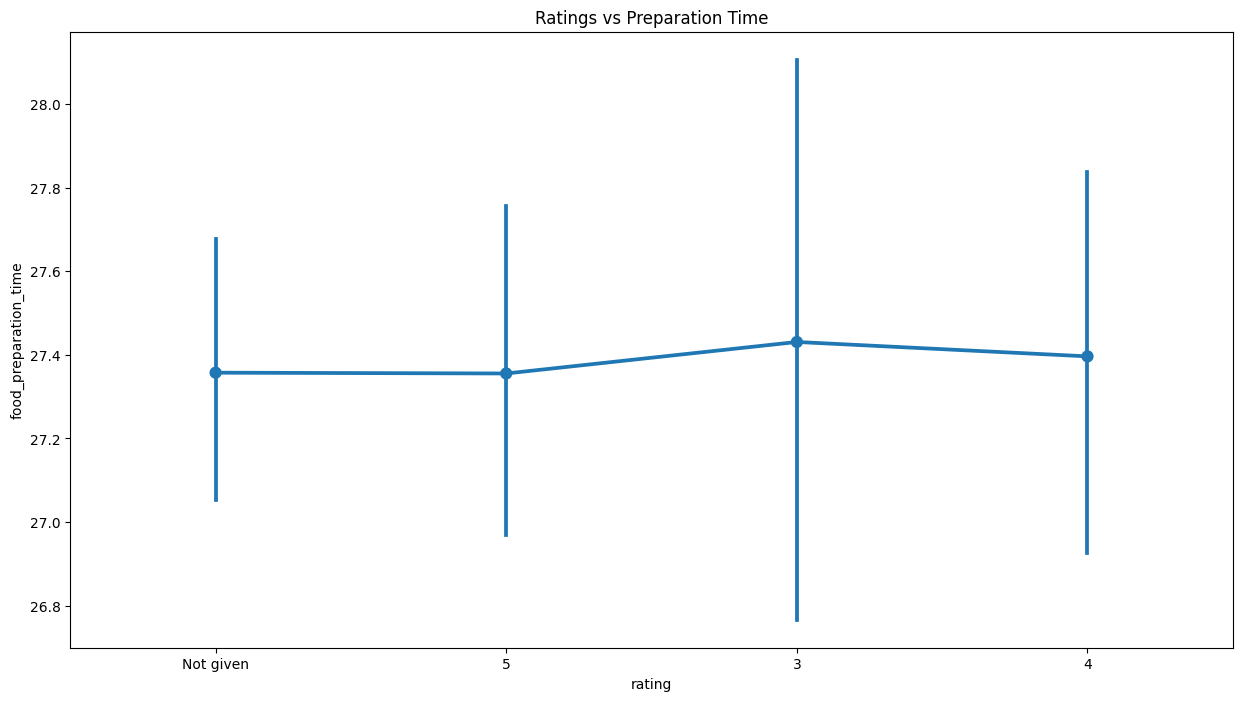

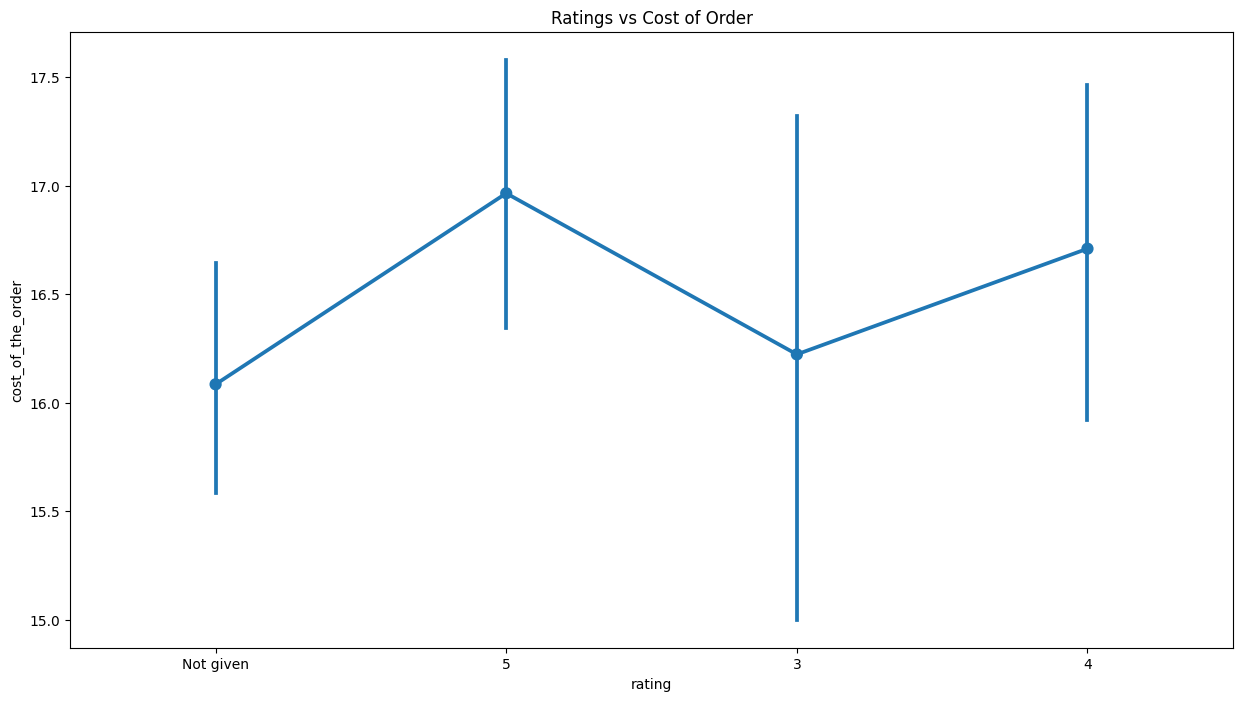

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(data = df, x = 'rating', y ='delivery_time')
plt.title("Ratings vs Delivery Time")
plt.show()
# Preparation Time
plt.figure(figsize=(15,8))
sns.pointplot(data = df, x = 'rating', y ='food_preparation_time')
plt.title("Ratings vs Preparation Time")
plt.show()
# Cost of Order
plt.figure(figsize=(15,8))
sns.pointplot(data = df, x = 'rating', y ='cost_of_the_order')
plt.title("Ratings vs Cost of Order")
plt.show()

#### **Day of the week vs cuisine type**

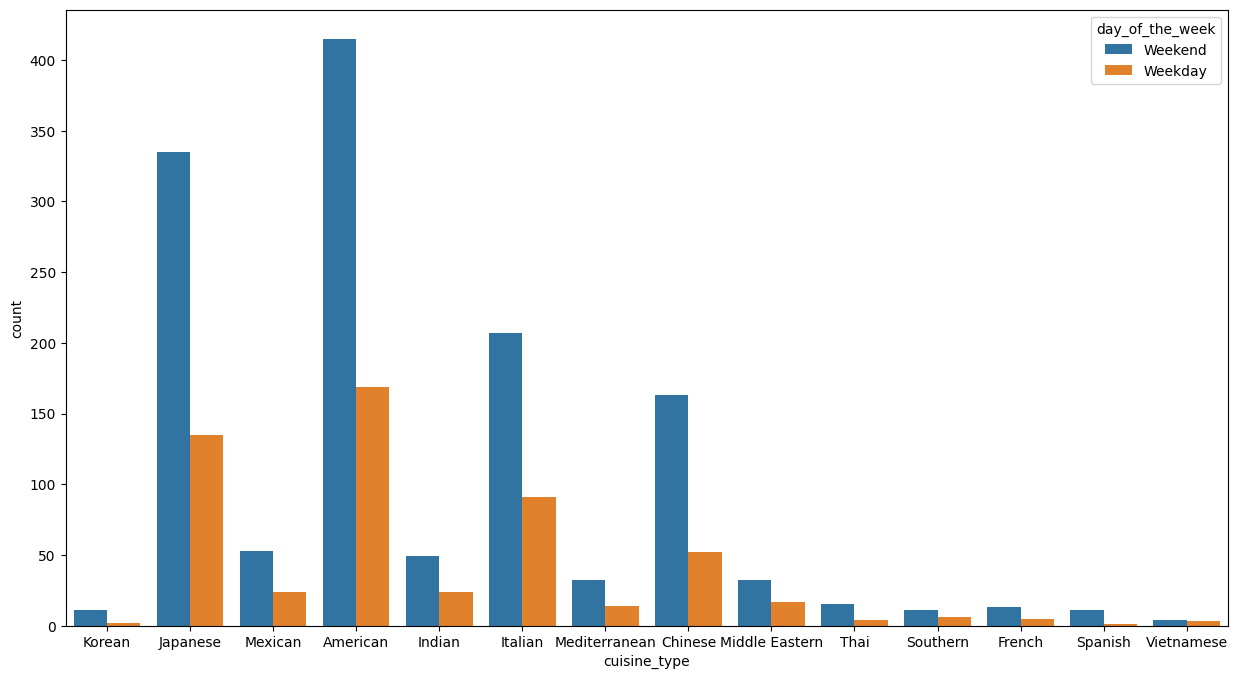

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x ='cuisine_type', hue = 'day_of_the_week')
plt.show()

#### Observation:
  - American Cuisine remains the most popular cuisine even on the weekdays.
  - There are significantly more orders on the weekends compared to the weekday for every type of cuisine.

#### **Day of the week vs. cost, preparation time, and delivery time.**

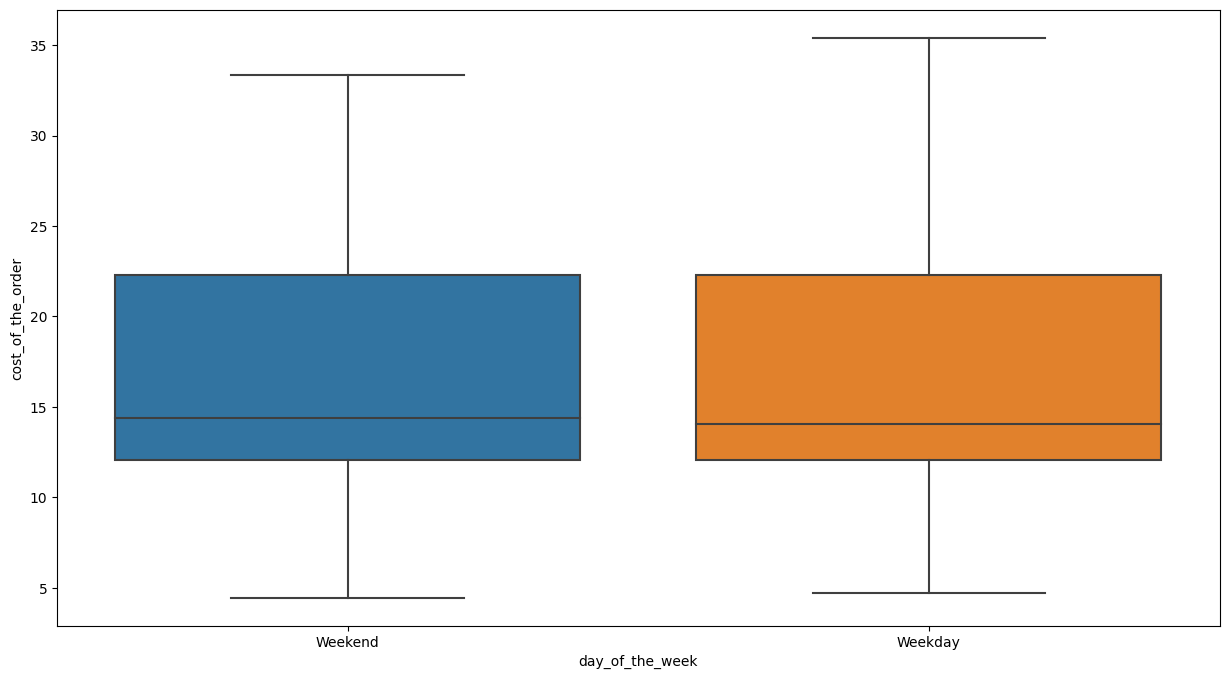

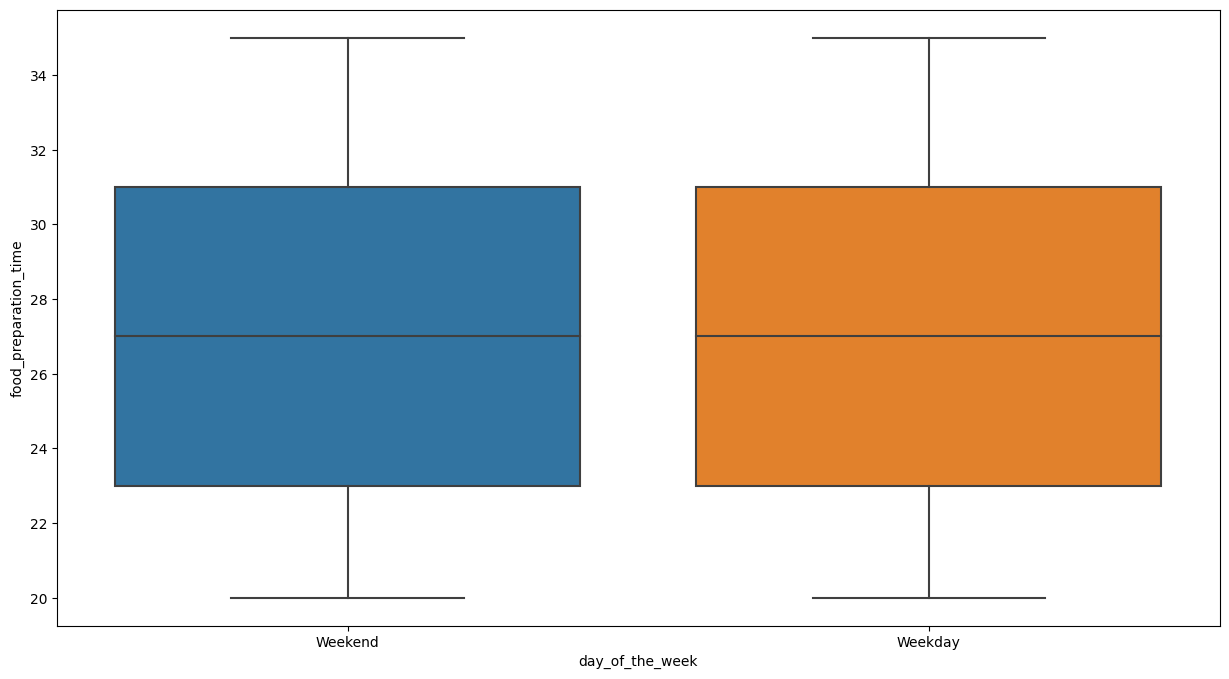

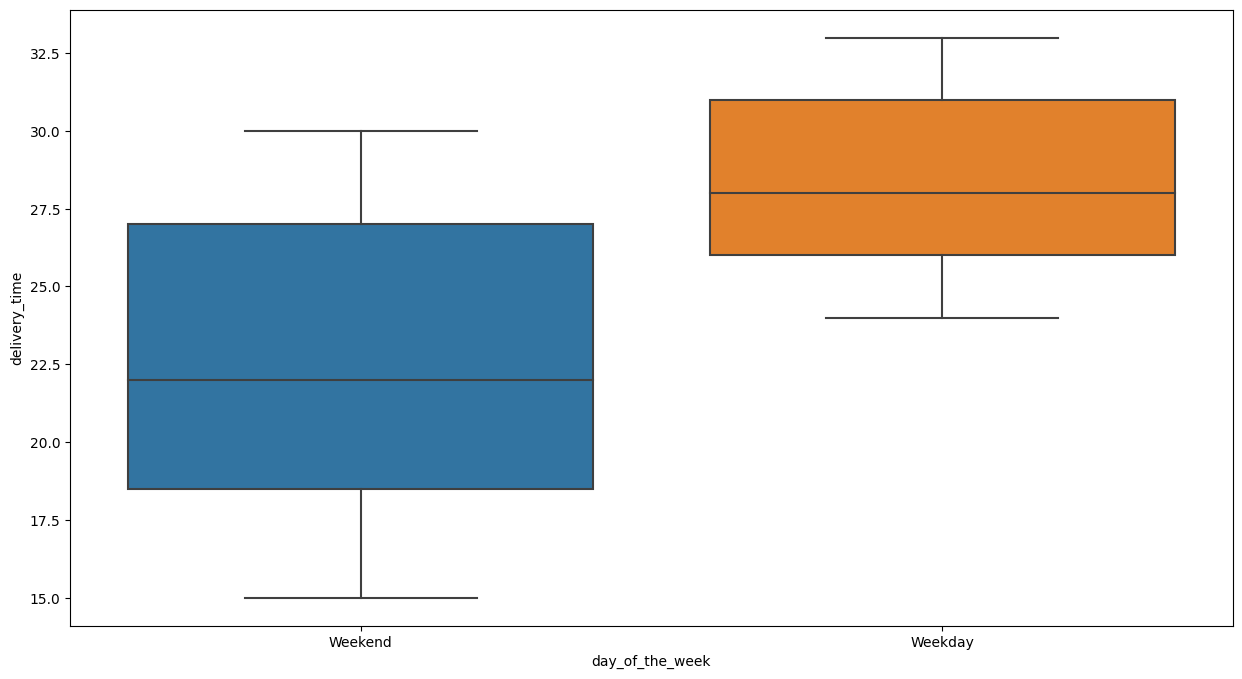

In [ ]:
# Cost of the order
plt.figure(figsize=(15,8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order')
plt.show()
# Preparation Type
plt.figure(figsize=(15,8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time')
plt.show()
# Delivery Time
plt.figure(figsize=(15,8))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
plt.show()

#### Observation:
  - The cost of orders on the weekday has a slightly higher maximum than on the weekend while food preparation is identical for both weekdays and weekends.
  - Delivery time takes longer on weekdays, ranging from 23 to 33 minutes and 15 to 30 minutes respectively.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
# Convert ratings column from object to numeric.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Copy into new dataframe.
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated ['rating'] = df_rated['rating'].astype('float')

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Han Dynasty,23


In [ ]:
#Fiter the restaurants that have above 50 ratings.
abv_50 = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'].copy()
df_abv_50 = df_rated[df_rated['restaurant_name'].isin(abv_50)].copy()

# Groupby the ratings for each restaurant with above 50 ratings.
df_top4 = df_abv_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

#Filter to only include restaurants whose mean rating is > 4
promo = df_top4[df_top4['rating'] > 4]#['restaurant_name'].copy()
promo

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: The following restaurants meet the criteria to receive the promotional offer:
  - The Meatball Shop
  - Blue Ribbon Fried Chicken
  - Shake Shack
  - Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [ ]:
net_revenue = df['Revenue'].sum().round(2)
print("The total revenue is around", net_revenue, 'dollars')

The total revenue is around 6166.3 dollars


#### Observations: The total revenue is around $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_time'] = df.food_preparation_time + df.delivery_time
df.head()
over_60 = df[df['total_time'] > 60]
percent_over_60 = len(over_60) / len(df) * 100
print(round(percent_over_60, 2), "% of orders take more than 60 minutes to get delivered from the time the order is placed.")



10.54 % of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations: 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df_weekenday = df.groupby(['day_of_the_week'])['delivery_time'].agg(['mean', 'count']).round(0).reset_index()
df_weekenday

,day_of_the_week,mean,count
0,Weekday,28.0,547
1,Weekend,22.0,1351


#### Observations:
  - The mean delivery time on weekdays is 28 minutes while the mean delivery time on weekends is 22 minutes.
  - While there are significantly more orders on the weekend, the order delivery time is significantly shorter on the weekends compared to weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  American cuisine is the most popular type of cuisine on both weekdays and weekends. There is a consistent pattern in cuisine popularity on both weekddays and weekend.
* Most of the cuisines have  approximately the same food preparation time, and there are significantly more order demands on the weekends than the weekdays for every type of cuisine.
*Although there is more order demand on the weekends than the weekday,delivery time is significantly shorter on the weekends. Therefore delivery time is a significant variable in the total preparation time as the food preparation time is consistent among all types of cuisines.

### Recommendations:

*  Enhance customer experience by encouraging more ratings for each order through promotional offers that reward customers for providing feedback, as approximately 38% of customers did not rate their order experience.
* Increase weekday marketing efforts, as weekends show significantly higher order volumes across all cuisine types, which could attract more customers during the week and boost sales.
* Analyze customers' demographics to discern variations in order volume between weekends and weekdays, potentially yielding insights into the socioeconomic status of customers more inclined to order on weekdays.
* Perform further analysis to understand the reasons behind longer delivery times on the weekdays compared to weekends. Shortening weekday delivery times may enhance the overall customer experience and attract more weekday customers.


---